In [6]:
# Importing needful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing

# naive and gaussian model
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split

# for accuracy
from sklearn import metrics

# print precision and recall
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.datasets import load_digits

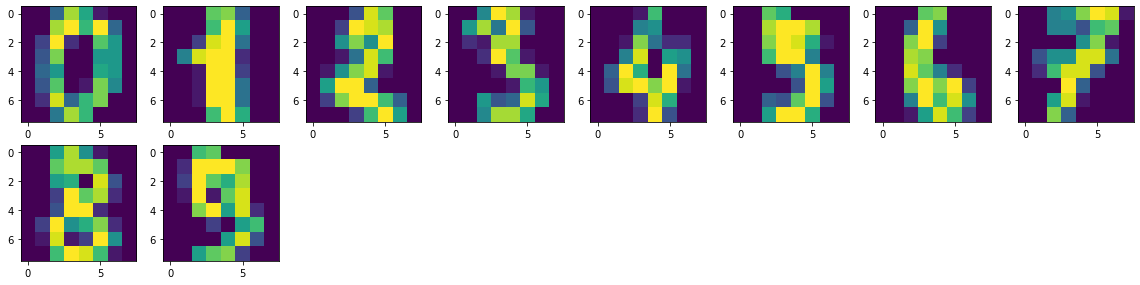

In [7]:
# Loading digits dataset from sklearn

main_data = load_digits()

plt.figure(figsize = (20, 20))

for i in range(10):
    plt.subplot(8, 8, i + 1)
    plt.imshow(main_data.images[i])

In [8]:
#Train Test Model with 80%-20%
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(main_data.data, main_data.target, test_size = 0.20, random_state = 87) 

In [9]:
# Gaussina models

gnb = GaussianNB()

# train model
gnb.fit(X_train, Y_train)

# training completed
Y_predicted = gnb.predict(X_test)

print(f"Accuracy :- {metrics.accuracy_score(Y_test, Y_predicted)}")
main_data.images[3]

Accuracy :- 0.8472222222222222


array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

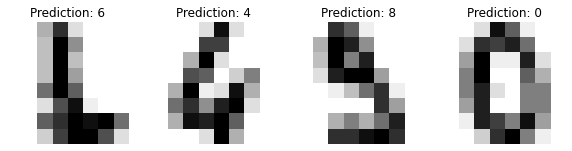

In [10]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, Y_predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [11]:
print(f"Classification report for classifier {gnb}:\n"
      f"{metrics.classification_report(Y_test, Y_predicted)}\n")

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.90      0.76      0.82        37
           2       1.00      0.62      0.77        37
           3       0.92      0.87      0.89        38
           4       0.92      0.80      0.85        44
           5       0.90      0.90      0.90        31
           6       0.90      0.97      0.93        29
           7       0.73      0.97      0.83        33
           8       0.55      0.94      0.69        31
           9       0.90      0.72      0.80        36

    accuracy                           0.85       360
   macro avg       0.87      0.85      0.85       360
weighted avg       0.88      0.85      0.85       360




Confusion matrix:
[[43  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  2  0  4  3]
 [ 0  2 23  0  0  0  0  0 12  0]
 [ 0  0  0 33  0  0  0  2  3  0]
 [ 1  0  0  0 35  1  1  5  1  0]
 [ 0  0  0  0  0 28  0  3  0  0]
 [ 0  0  0  0  0  1 28  0  0  0]
 [ 0  0  0  0  1  0  0 32  0  0]
 [ 0  1  0  0  0  0  0  1 29  0]
 [ 0  0  0  3  1  1  0  1  4 26]]


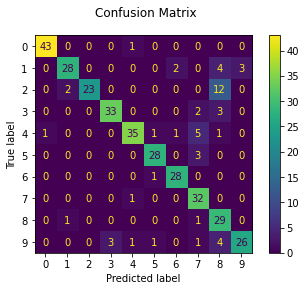

In [12]:
disp = metrics.plot_confusion_matrix(gnb, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()